In [1]:
import pandas as pd
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_columns = 100
%matplotlib inline

In [2]:
df_train = pd.read_csv("data/train.tsv", sep="\t", names=["text","label", "id"])
df_val = pd.read_csv("data/dev.tsv", sep="\t", names=["text","label", "id"])
df_test = pd.read_csv("data/test.tsv", sep="\t", names=["text","label", "id"])
print(f"[Train] the dataframe shape: {df_train.shape}")
print(f"[Val] the dataframe shape: {df_val.shape}")
print(f"[Test] the dataframe shape: {df_test.shape}")

[Train] the dataframe shape: (43410, 3)
[Val] the dataframe shape: (5426, 3)
[Test] the dataframe shape: (5427, 3)


Concat all datasets

In [3]:
df = pd.concat([df_train, df_val, df_test])

# Dataframe Preprocessing

In [4]:
df

,text,label,id
0,My favourite food is anything I didn't have to...,27,eebbqej
1,"Now if he does off himself, everyone will thin...",27,ed00q6i
2,WHY THE FUCK IS BAYLESS ISOING,2,eezlygj
3,To make her feel threatened,14,ed7ypvh
4,Dirty Southern Wankers,3,ed0bdzj
...,...,...,...
5422,Thanks. I was diagnosed with BP 1 after the ho...,15,efeeasc
5423,Well that makes sense.,4,ef9c7s3
5424,Daddy issues [NAME],27,efbiugo
5425,So glad I discovered that subreddit a couple m...,0,efbvgp9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54263 entries, 0 to 5426
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    54263 non-null  object
 1   label   54263 non-null  object
 2   id      54263 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [6]:
df['List of classes'] = df['label'].apply(lambda x: x.split(','))
df['Len of classes'] = df['List of classes'].apply(lambda x: len(x))
print(f"max len of classes: {df['Len of classes'].max()}")

max len of classes: 5


In [7]:
df[df['Len of classes'] == 5]

,text,label,id,List of classes,Len of classes
7873,Yeah I probably would've started crying on the...,"9,12,14,19,25",ee6lqiq,"[9, 12, 14, 19, 25]",5


[45446, 8124, 655, 37, 1]


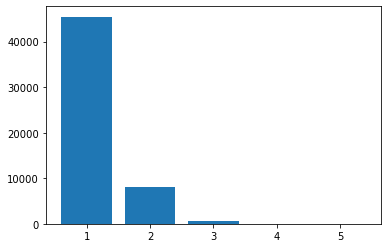

In [8]:
temp_df = df["Len of classes"].value_counts()
print(temp_df.to_list())
plt.bar(x=range(1,6), height=temp_df.to_list());

In [9]:
# from emotion.txt we get the labels for each for those emotions
label_to_emotion = {}
with open("data/emotions.txt") as f:
    for i,line in enumerate(f):
        label_to_emotion[str(i)] = line.strip("\n")
print(label_to_emotion)

{'0': 'admiration', '1': 'amusement', '2': 'anger', '3': 'annoyance', '4': 'approval', '5': 'caring', '6': 'confusion', '7': 'curiosity', '8': 'desire', '9': 'disappointment', '10': 'disapproval', '11': 'disgust', '12': 'embarrassment', '13': 'excitement', '14': 'fear', '15': 'gratitude', '16': 'grief', '17': 'joy', '18': 'love', '19': 'nervousness', '20': 'optimism', '21': 'pride', '22': 'realization', '23': 'relief', '24': 'remorse', '25': 'sadness', '26': 'surprise', '27': 'neutral'}


In [10]:
for i in label_to_emotion:
    df[label_to_emotion[i]] = df['List of classes'].apply(lambda x: 1 if i in x else 0)

In [11]:
df.drop(['label', 'id', 'List of classes', 'Len of classes'], axis=1, inplace =True)

In [12]:
df

,text,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,disapproval,disgust,embarrassment,excitement,fear,gratitude,grief,joy,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,My favourite food is anything I didn't have to...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,"Now if he does off himself, everyone will thin...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,WHY THE FUCK IS BAYLESS ISOING,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,To make her feel threatened,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Dirty Southern Wankers,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5422,Thanks. I was diagnosed with BP 1 after the ho...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5423,Well that makes sense.,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5424,Daddy issues [NAME],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5425,So glad I discovered that subreddit a couple m...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
# taking only Joy, Sad, Angry, and Neutral
df = df[(df["joy"]==1) | (df["sadness"]==1) | (df["anger"]==1) | (df["neutral"]==1)].loc[:,["text", "anger","joy", "sadness", "neutral"]]
df.reset_index(drop=True, inplace=True)

In [14]:
df

,text,anger,joy,sadness,neutral
0,My favourite food is anything I didn't have to...,0,0,0,1
1,"Now if he does off himself, everyone will thin...",0,0,0,1
2,WHY THE FUCK IS BAYLESS ISOING,1,0,0,0
3,It might be linked to the trust factor of your...,0,0,0,1
4,Hello everyone. Im from Toronto as well. Can c...,0,0,0,1
...,...,...,...,...,...
22895,The essay is optional.,0,0,0,1
22896,Waiting for both of these things is torture,0,0,0,1
22897,Easy just include [NAME] to continue to tormen...,0,0,0,1
22898,Daddy issues [NAME],0,0,0,1


{'neutral': 17772, 'anger': 1960, 'joy': 1785, 'sadness': 1625}


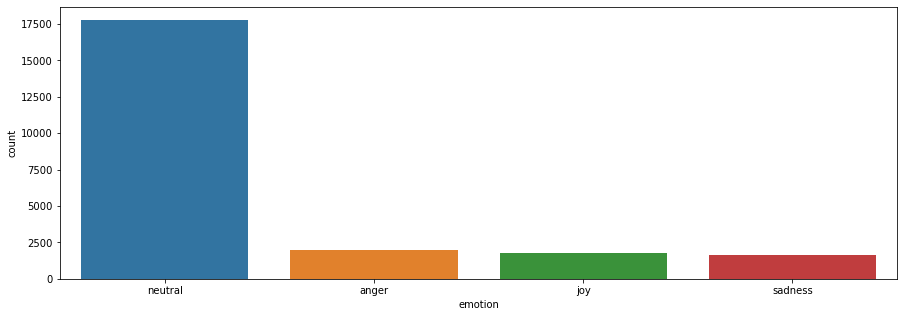

In [15]:
temp_list = df.drop(['text'], axis=1).sum(axis=0).tolist()
counts= dict(zip(["anger","joy", "sadness", "neutral"], temp_list))
sorted_counts = dict(sorted(counts.items(), key=lambda item: item[1], reverse=True))
print(sorted_counts)
counts_df = pd.DataFrame(sorted_counts.items(), columns=["emotion", "count"])
plt.subplots(figsize=(15,5))
sns.barplot(data = counts_df, x="emotion", y="count", order=counts_df['emotion']);

In [16]:
filter_ = (df.drop(['text'], axis=1).sum(axis=1)>1) == True
print(f"sum of values where there is conflict: {filter_.sum()}")
# drop all rows where there is conflict
df.drop(index = df.loc[filter_].index, inplace=True)

sum of values where there is conflict: 242


In [17]:
labels = ["anger", "joy", "sadness", "neutral"]
for index, row in df.iterrows():
    df.loc[index,"emotion"] = labels[np.argmax(row.iloc[1:].tolist())]

In [18]:
df

,text,anger,joy,sadness,neutral,emotion
0,My favourite food is anything I didn't have to...,0,0,0,1,neutral
1,"Now if he does off himself, everyone will thin...",0,0,0,1,neutral
2,WHY THE FUCK IS BAYLESS ISOING,1,0,0,0,anger
3,It might be linked to the trust factor of your...,0,0,0,1,neutral
4,Hello everyone. Im from Toronto as well. Can c...,0,0,0,1,neutral
...,...,...,...,...,...,...
22895,The essay is optional.,0,0,0,1,neutral
22896,Waiting for both of these things is torture,0,0,0,1,neutral
22897,Easy just include [NAME] to continue to tormen...,0,0,0,1,neutral
22898,Daddy issues [NAME],0,0,0,1,neutral


In [19]:
df[["text", "emotion"]].to_csv("data/processed_all.csv", index=False)